In [1]:
using DifferentialEquations
using Plots
using DataFrames


In [2]:
function light_scatter(L, I0, α, β, X)
    
    z = [0;
         collect(1:10) / 10 * L]
    
    I = I0 * exp.( - ( α * X + β ) .* z)
    j = 0
    μM = 0

    for intensity in I
        
        if (j == 0) || (j == 0)
            ax =     intensity / (intensity + ks + intensity^2/ki)
        else
            ax = 2 * intensity / (intensity + ks + intensity^2/ki)
        end
        
    j += 1    
    μM += ax
    
    end
    
    return μM
end  
    
function FAME(dx, x, p, t)
    
    # extract params
    
    I0, α, β, μM0, μN, μd, ϵ, γ, ki, kq, kN, ks, θ  = p  
    BM, N, q, f = x  
    
    # calc light scattering
    
    μM = μM0 / 20 * light_scatter(0.044, I0, α, β, BM)
    μ0 = μM * ( 1 - kq/x[3])
      
    # dynamic eqs
    
    dx[1] =  x[1] * (μ0-μd)                                       # dXdt = X(u0-ud)
    dx[2] = -μN * x[1] * x[2]/(x[2]+kN)                           # dNdt = -uN N/(N+kN)X
    dx[3] =  μN * x[2]/(x[2]+kN) - μM * ( 1-kq/x[3]) * x[3]       # dqdt = uN N/N+kN -um(I)(1-kq/q)*q
    dx[4] =  μ0 * (θ*x[3]-ϵ*x[4]) - γ * μN * x[2]/(x[2]+kN)       # dfdt = um(I) ( theata*q-eps*f)(1-kq/q) - 
                                                                  #        gamma uN N/N+k
    
end


FAME (generic function with 1 method)

___
___


#### Initial Conditions:

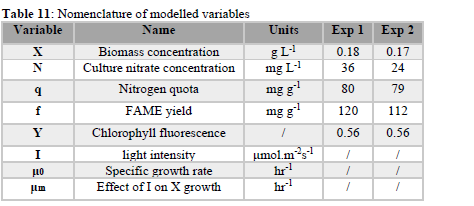




#### Optimal Params

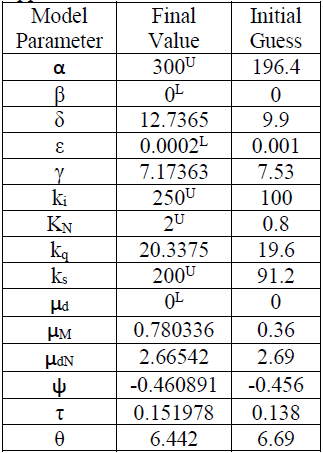

In [32]:
I0 = 160
α = 196.4
β = 0
μM0 = 0.359
μN = 2.6654
μd = 0
ϵ = 0.01
γ = 7.17
ki = 100
kq = 20.3375
kN = 2.6645
ks = 91.2
θ = 6.69
p = [I0; α; β; μM0; μN; μd; ϵ; γ; ki; kq; kN; ks; θ] 


    
x0 = [.18; 36; 80; 120]

tspan = (0.0,200.0)

prob = ODEProblem(FAME,x0,tspan, p)
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 174-element Array{Float64,1}:
   0.0
   0.015170908483963843
   0.14101136603268377
   0.375056287952255
   0.6605715246019843
   1.0156237786357496
   1.4301515410666479
   1.9091423805885968
   2.447616424014315
   3.0460156316366143
   3.70197028885489
   4.415395151854003
   5.185998635956958
   ⋮
 183.3895530537191
 184.9479374777909
 186.5032257856688
 188.05549738398432
 189.60482847915338
 191.15129313171428
 192.69496287151648
 194.2359073342723
 195.77419367148215
 197.3098869799932
 198.84305062593427
 200.0
u: 174-element Array{Array{Float64,1},1}:
 [0.18, 36.0, 80.0, 120.0]
 [0.18024065351236587, 35.99321852825148, 79.93081023066811, 120.44320146456889]
 [0.1822434125145904, 35.93662064681853, 79.36297479078176, 124.0786156477674]
 [0.18599906087294896, 35.82970276911924, 78.33532686938446, 130.6488593328491]
 [0.19063368262897426, 35.69633204796897, 77.13048265793307, 138.33620261350757]
 [0.196

In [4]:
plot(sol)

LoadError: [91mUndefVarError: sol not defined[39m

In [5]:
res_frame = DataFrame( Time = sol.t[:],
                       Biomass = sol[1,:],
                       Nitrate = sol[2,:],
                       N_quota = sol[3,:],
                       FAME_yield = sol[4,:])

plot(res_frame[!,"Time"], res_frame[!, "FAME_yield"])

LoadError: [91mUndefVarError: sol not defined[39m

In [6]:
z = collect(1:10)/10 * 0.44
z*1

10-element Array{Float64,1}:
 0.044000000000000004
 0.08800000000000001
 0.132
 0.17600000000000002
 0.22
 0.264
 0.308
 0.35200000000000004
 0.396
 0.44

In [7]:
using Distributions

In [8]:
function prob_func(prob,i,repeat)
  noise = (1. .- randn(13)*0.05)
  p_new = p.*noise
  remake(prob,p=p_new)
end

prob_func (generic function with 1 method)

In [33]:
ensemble_prob = EnsembleProblem(prob,prob_func=prob_func)
sim = solve(ensemble_prob,Tsit5(),trajectories=50)


EnsembleSolution Solution of length 50 with uType:
ODESolution{Float64,2,Array{Array{Float64,1},1},Nothing,Nothing,Array{Float64,1},Array{Array{Array{Float64,1},1},1},ODEProblem{Array{Float64,1},Tuple{Float64,Float64},true,Array{Float64,1},ODEFunction{true,typeof(FAME),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}},SciMLBase.StandardODEProblem},Tsit5,OrdinaryDiffEq.InterpolationData{ODEFunction{true,typeof(FAME),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},OrdinaryDiffEq.Tsit5Cache{Array{Float64,1},Array{Float64,1},Array{Float64,1},OrdinaryDiffEq.Tsit5ConstantCache{Float64,Float64}}},DiffEqBase.DEStats}

In [10]:
plotly()
curr_startrow = 1
for idx in range(13)
    curr_endrow = j + 13
    curr_SO = sbl.S2[,:]

┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots /home/dominikk/.julia/packages/Plots/z5Msu/src/backends.jl:372


LoadError: [91msyntax: unexpected ","[39m

In [34]:
summ = EnsembleSummary(sim, 0:1:200)


EnsembleSolution Solution of length 201 with uType:
Float64

In [41]:
plot(summ, idxs = (2),
     fillalpha=0.5, label="Biomass")

<!DOCTYPE html>
 
 
 Plots.jl

In [42]:
plot(summ, idxs = (3),
     fillalpha=0.5, label="Biomass")

<!DOCTYPE html>
 
 
 Plots.jl

In [43]:
plot(summ, idxs = (4),
     fillalpha=0.5, label="Biomass")

<!DOCTYPE html>
 
 
 Plots.jl

In [46]:
summ.qhigh[4,:]

201-element Array{Float64,1}:
 120.0
 150.4052253517429
 176.1181745914582
 197.83705598027433
 216.23907922973
 231.68701320390736
 244.44837888797315
 255.13805378847826
 264.3752778234203
 272.0566240988484
 278.062208043231
 282.7236290062897
 286.29677731183403
   ⋮
 541.3794585574555
 541.5341052718554
 541.6861895005865
 541.8357594792377
 541.9828633758058
 542.1275443824819
 542.2698489914441
 542.409819194075
 542.5474993342156
 542.6829306432305
 542.8161519016129
 542.9472076065497

In [35]:
T = typeof(summ)
for (name, typ) in zip(fieldnames(T), T.types)
    println("type of the fieldname $name is $typ")
end


type of the fieldname t is StepRange{Int64,Int64}
type of the fieldname u is DiffEqArray{Float64,2,Array{Array{Float64,1},1},StepRange{Int64,Int64}}
type of the fieldname v is DiffEqArray{Float64,2,Array{Array{Float64,1},1},StepRange{Int64,Int64}}
type of the fieldname qlow is DiffEqArray{Float64,2,Array{Array{Float64,1},1},StepRange{Int64,Int64}}
type of the fieldname qhigh is DiffEqArray{Float64,2,Array{Array{Float64,1},1},StepRange{Int64,Int64}}
type of the fieldname num_monte is Int64
type of the fieldname elapsedTime is Float64
type of the fieldname converged is Bool


In [14]:
low = DataFrame(summ.qlow)
high = DataFrame(summ.qhigh)
med = DataFrame(summ.u)


LoadError: [91mUndefVarError: summ not defined[39m

In [39]:
plot(summ.t, summ.v[2,:])
plot!(summ.t, summ.u[2,:])

<!DOCTYPE html>
 
 
 Plots.jl

In [15]:
using CSV

CSV.write("low.csv", low)
CSV.write("high.csv", high)
CSV.write("med.csv", med)

LoadError: [91mUndefVarError: low not defined[39m

In [16]:
k = hcat(x, y)
k = hcat(k, y)

LoadError: [91mUndefVarError: x not defined[39m

In [17]:
k[:,2:end]

LoadError: [91mUndefVarError: k not defined[39m

In [18]:
y = [[1,2] [3,4]]

2×2 Array{Int64,2}:
 1  3
 2  4

In [19]:
nms = ["I0";"α"; "β"; "μM0"; "μN"; "μd"; "ϵ"; "γ"; "ki"; "kq"; "kN"; "ks"; "θ"]
SOs = Base.Iterators.product(nms, nms)

Base.Iterators.ProductIterator{Tuple{Array{String,1},Array{String,1}}}((["I0", "α", "β", "μM0", "μN", "μd", "ϵ", "γ", "ki", "kq", "kN", "ks", "θ"], ["I0", "α", "β", "μM0", "μN", "μd", "ϵ", "γ", "ki", "kq", "kN", "ks", "θ"]))

In [20]:
list(SOs)

LoadError: [91mUndefVarError: list not defined[39m

In [21]:
vec(collect(Base.product(zip(nms, nms)...)))

8192-element Array{NTuple{13,String},1}:
 ("I0", "α", "β", "μM0", "μN", "μd", "ϵ", "γ", "ki", "kq", "kN", "ks", "θ")
 ("I0", "α", "β", "μM0", "μN", "μd", "ϵ", "γ", "ki", "kq", "kN", "ks", "θ")
 ("I0", "α", "β", "μM0", "μN", "μd", "ϵ", "γ", "ki", "kq", "kN", "ks", "θ")
 ("I0", "α", "β", "μM0", "μN", "μd", "ϵ", "γ", "ki", "kq", "kN", "ks", "θ")
 ("I0", "α", "β", "μM0", "μN", "μd", "ϵ", "γ", "ki", "kq", "kN", "ks", "θ")
 ("I0", "α", "β", "μM0", "μN", "μd", "ϵ", "γ", "ki", "kq", "kN", "ks", "θ")
 ("I0", "α", "β", "μM0", "μN", "μd", "ϵ", "γ", "ki", "kq", "kN", "ks", "θ")
 ("I0", "α", "β", "μM0", "μN", "μd", "ϵ", "γ", "ki", "kq", "kN", "ks", "θ")
 ("I0", "α", "β", "μM0", "μN", "μd", "ϵ", "γ", "ki", "kq", "kN", "ks", "θ")
 ("I0", "α", "β", "μM0", "μN", "μd", "ϵ", "γ", "ki", "kq", "kN", "ks", "θ")
 ("I0", "α", "β", "μM0", "μN", "μd", "ϵ", "γ", "ki", "kq", "kN", "ks", "θ")
 ("I0", "α", "β", "μM0", "μN", "μd", "ϵ", "γ", "ki", "kq", "kN", "ks", "θ")
 ("I0", "α", "β", "μM0", "μN", "μd", "ϵ", "γ", 

In [22]:
using Combinatorics
collect(combinations(1:3,2))

LoadError: [91mArgumentError: Package Combinatorics not found in current path:[39m
[91m- Run `import Pkg; Pkg.add("Combinatorics")` to install the Combinatorics package.[39m


In [23]:
x = Array{Int32}(undef, 78)
X = zeros(13,13)

x[1:end] = collect(1:78)

curr_startrow = 1
curr_count    = 0

for idx in collect(1:12)
    curr_endrow = curr_startrow + 12 - (1*(curr_count+1))
    curr_SO = x[curr_startrow:curr_endrow]
    X[idx, idx+1:(idx+1+(curr_endrow-curr_startrow))] = curr_SO
    curr_startrow = curr_endrow + 1
    curr_count += 1
end

In [24]:
X = 0.5 .* (X .+ transpose(X))
X[diagind(X)] .= 1

LoadError: [91mUndefVarError: diagind not defined[39m

In [25]:
X

13×13 Array{Float64,2}:
 0.0   0.5   1.0   1.5   2.0   2.5   3.0   3.5   4.0   4.5   5.0   5.5   6.0
 0.5   0.0   6.5   7.0   7.5   8.0   8.5   9.0   9.5  10.0  10.5  11.0  11.5
 1.0   6.5   0.0  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5
 1.5   7.0  12.0   0.0  17.0  17.5  18.0  18.5  19.0  19.5  20.0  20.5  21.0
 2.0   7.5  12.5  17.0   0.0  21.5  22.0  22.5  23.0  23.5  24.0  24.5  25.0
 2.5   8.0  13.0  17.5  21.5   0.0  25.5  26.0  26.5  27.0  27.5  28.0  28.5
 3.0   8.5  13.5  18.0  22.0  25.5   0.0  29.0  29.5  30.0  30.5  31.0  31.5
 3.5   9.0  14.0  18.5  22.5  26.0  29.0   0.0  32.0  32.5  33.0  33.5  34.0
 4.0   9.5  14.5  19.0  23.0  26.5  29.5  32.0   0.0  34.5  35.0  35.5  36.0
 4.5  10.0  15.0  19.5  23.5  27.0  30.0  32.5  34.5   0.0  36.5  37.0  37.5
 5.0  10.5  15.5  20.0  24.0  27.5  30.5  33.0  35.0  36.5   0.0  38.0  38.5
 5.5  11.0  16.0  20.5  24.5  28.0  31.0  33.5  35.5  37.0  38.0   0.0  39.0
 6.0  11.5  16.5  21.0  25.0  28.5  31.5  34.0  36.0

In [26]:
nms = ["I0";"α"; "β"; "μM0"; "μN"; "μd"; "ϵ"; "γ"; "ki"; "kq"; "kN"; "ks"; "θ"]

df = convert(DataFrame, X)

,x1,x2,x3,x4,x5,x6,x7,x8,x9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0
2,0.5,0.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5
3,1.0,6.5,0.0,12.0,12.5,13.0,13.5,14.0,14.5
4,1.5,7.0,12.0,0.0,17.0,17.5,18.0,18.5,19.0
5,2.0,7.5,12.5,17.0,0.0,21.5,22.0,22.5,23.0
6,2.5,8.0,13.0,17.5,21.5,0.0,25.5,26.0,26.5
7,3.0,8.5,13.5,18.0,22.0,25.5,0.0,29.0,29.5
8,3.5,9.0,14.0,18.5,22.5,26.0,29.0,0.0,32.0
9,4.0,9.5,14.5,19.0,23.0,26.5,29.5,32.0,0.0


In [27]:
df = rename!(df, Symbol.(nms))

,I0,α,β,μM0,μN,μd,ϵ,γ,ki
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0
2,0.5,0.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5
3,1.0,6.5,0.0,12.0,12.5,13.0,13.5,14.0,14.5
4,1.5,7.0,12.0,0.0,17.0,17.5,18.0,18.5,19.0
5,2.0,7.5,12.5,17.0,0.0,21.5,22.0,22.5,23.0
6,2.5,8.0,13.0,17.5,21.5,0.0,25.5,26.0,26.5
7,3.0,8.5,13.5,18.0,22.0,25.5,0.0,29.0,29.5
8,3.5,9.0,14.0,18.5,22.5,26.0,29.0,0.0,32.0
9,4.0,9.5,14.5,19.0,23.0,26.5,29.5,32.0,0.0


In [28]:
using LinearAlgebra
diagind(X,-1)

2:14:156

In [29]:
using CSV, DataFrames, Plots, LinearAlgebra



df = CSV.read("SO.csv", DataFrame, header=false)
SOMatrix = zeros(13,13)
nms = ["I0";"α"; "β"; "μM0"; "μN"; "μd"; "ϵ"; "γ"; "ki"; "kq"; "kN"; "ks"; "θ"]

y = 1;
ct    = 0;

for idx in collect(1:12)
    curr_endrow = y + 12 - ( 1 * (ct + 1 ) )
    curr_SO = Array(df[2,y:curr_endrow])
    SOMatrix[idx, idx+1:(idx+1+(curr_endrow-y))] = curr_SO

    y = curr_endrow + 1
    ct += 1
end

SOMatrix = 0.5 .* (SOMatrix .+ transpose(SOMatrix))
SOMatrix[diagind(SOMatrix)] .= 0

SO_df = convert(DataFrame, SOMatrix)
SO_df = rename!(SO_df, Symbol.(nms))

LoadError: [91mMethodError: [0mCannot `convert` an object of type [92mString[39m[0m to an object of type [91mFloat64[39m[39m
[91m[0mClosest candidates are:[39m
[91m[0m  convert(::Type{T}, [91m::Static.StaticInt{N}[39m) where {T<:Number, N} at /home/dominikk/.julia/packages/Static/BGJW6/src/static_implementation.jl:22[39m
[91m[0m  convert(::Type{T}, [91m::Static.StaticFloat64{N}[39m) where {N, T<:AbstractFloat} at /home/dominikk/.julia/packages/Static/BGJW6/src/float.jl:26[39m
[91m[0m  convert(::Type{T}, [91m::VectorizationBase.LazyMulAdd{M,O,I}[39m) where {M, O, I, T<:Number} at /home/dominikk/.julia/packages/VectorizationBase/343do/src/lazymul.jl:20[39m
[91m[0m  ...[39m

In [30]:
heatmap(nms, nms, log.(SOMatrix))

<!DOCTYPE html>
 
 
 Plots.jl

In [31]:
SOMatrix[:,9] .= 0
SOMatrix[9,:] .= 0

13-element view(::Array{Float64,2}, 9, :) with eltype Float64:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0